In [13]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [14]:
import sys
sys.path.insert(0,'../..')
import omama as O
from pyod.models.knn import KNN
import pickle
import sklearn

In [15]:
with open('/raid/mpsych/datasetA.pkl','rb') as f:
    datasetA_X = pickle.load(f)
    
with open('/raid/mpsych/datasetA_labels.pkl', 'rb') as f1:
    labels = np.asarray(pickle.load(f1))

In [16]:
X_feat_vect = O.Features.get_features(datasetA_X, 'hist', 'gaussian')

In [17]:
X_feat_vect[0]

array([3258608,    2834,    2005,    1503,    1194,    1353,     965,
           986,     954,     845,     783,     578,     972,     587,
           660,     559,     628,     699,     604,     450,     527,
           500,     684,     522,     454,     405,     513,     422,
           661,     396,     391,     469,     384,     388,     594,
           424,     339,     445,     370,     343,     368,     503,
           389,     397,     380,     330,     354,     337,     325,
           423,     461,     282,     310,     373,     296,     300,
           315,     337,     339,     316,     306,     327,     256,
           279,     241,     283,     287,     271,     256,     280,
           220,     274,     256,     274,     228,     236,     229,
           255,     234,     241,     215,     250,     248,     267,
           240,     223,     234,     258,     239,     228,     228,
           233,     283,     255,     296,     224,     267,     246,
           273,     

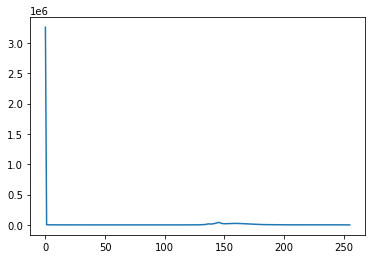

In [18]:
plt.plot(X_feat_vect[0])

In [31]:
import mahotas as mh
normalized_pixels = mh.gaussian_filter(datasetA_X[0].pixels, sigma=50)
#         normalized_pixels /= normalized_pixels.max()
#         normalized_pixels *= 255

In [36]:
feature2 = X_feat_vect[0].copy().astype(float)

In [37]:
feature2 /= feature2.max()

In [38]:
feature2.max()

1.0

In [39]:
feature2

array([1.00000000e+00, 8.69696508e-04, 6.15293401e-04, 4.61239891e-04,
       3.66414125e-04, 4.15207966e-04, 2.96138719e-04, 3.02583189e-04,
       2.92763045e-04, 2.59313179e-04, 2.40286650e-04, 1.77376352e-04,
       2.98286876e-04, 1.80138268e-04, 2.02540471e-04, 1.71545642e-04,
       1.92720327e-04, 2.14508772e-04, 1.85355219e-04, 1.38095776e-04,
       1.61725498e-04, 1.53439751e-04, 2.09905579e-04, 1.60191100e-04,
       1.39323294e-04, 1.24286198e-04, 1.57429184e-04, 1.29503150e-04,
       2.02847351e-04, 1.21524283e-04, 1.19989885e-04, 1.43926486e-04,
       1.17841729e-04, 1.19069247e-04, 1.82286424e-04, 1.30116909e-04,
       1.04032151e-04, 1.36561378e-04, 1.13545416e-04, 1.05259669e-04,
       1.12931657e-04, 1.54360389e-04, 1.19376126e-04, 1.21831162e-04,
       1.16614211e-04, 1.01270236e-04, 1.08635344e-04, 1.03418392e-04,
       9.97358381e-05, 1.29810029e-04, 1.41471450e-04, 8.65400195e-05,
       9.51326456e-05, 1.14466054e-04, 9.08363326e-05, 9.20638506e-05,
      

In [ ]:
pydicom.

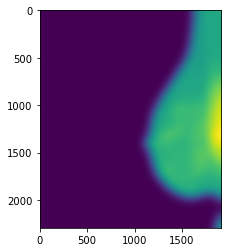

In [32]:
plt.imshow(normalized_pixels)

In [19]:
np.where(labels > 0)

(array([27, 38, 47, 48, 61, 63, 81, 90]),)

In [20]:
clf = KNN(method='mean')
clf.fit(X_feat_vect)
    
y_train_scores = clf.decision_scores_
pred_labels = clf.labels_
# y_test_scores = clf.decision_function(X_test)

In [21]:
eval = O.OutlierDetectorLite.evaluate(labels, pred_labels)

In [22]:
eval

{'groundtruth_indices': (array([27, 38, 47, 48, 61, 63, 81, 90]),),
 'pred_indices': (array([ 7, 10, 26, 33, 36, 37, 40, 72, 74, 82]),),
 'roc_auc': 0.44565217391304346,
 'f1_score': 0.0,
 'acc_score': 0.82,
 'jaccard_score': 0.0,
 'precision_score': 0.0,
 'average_precision': 0.08,
 'recall_score': 0.0,
 'hamming_loss': 0.18,
 'log_loss': 6.217059710826943,
 'tn': 82,
 'fp': 10,
 'fn': 8,
 'tp': 0}